In [3]:
%matplotlib widget
import os
import getpass
import shutil
from nilearn import datasets, plotting
import matplotlib.pyplot as plt
import numpy as np

from nilearn_tools import compute_connectome

In [6]:
subjectIdx = 5
saveto="neuro-bsp"

outfolder = os.path.join(os.path.abspath(os.path.expanduser(f"/cs/home/{getpass.getuser()}")), saveto)
shutil.rmtree(outfolder, ignore_errors=True)
os.makedirs(outfolder, exist_ok=True)

/opt/conda/envs/esi-2023a/lib/python3.10/site-packages/joblib/memory.py:349: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
/opt/conda/envs/esi-2023a/lib/python3.10/site-packages/numpy/core/_methods.py:236: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


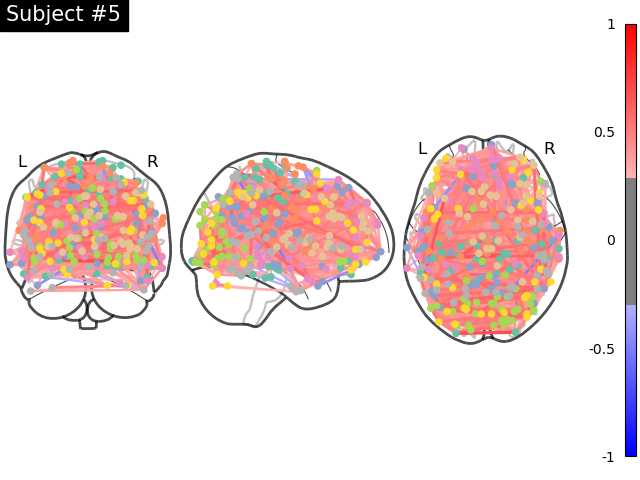

In [7]:
con = compute_connectome(subjectIdx)

In [ ]:
atlas = datasets.fetch_coords_power_2011(legacy_format=False)
coords = np.vstack((atlas.rois['x'], atlas.rois['y'], atlas.rois['z'])).T
fig = plt.figure()
plotting.plot_connectome(con, coords, title=f"Subject #{subjectIdx}",
                         edge_threshold="95%", node_size=20, colorbar=True,
                         edge_vmin=-1, edge_vmax=1, figure=fig)